In [1]:
# Importer la dépendance qui vont traiter avec notre os
import os
import pickle

# Installer les dépendances
# !pip install numpy numpy
# !pip install numpy pandas
# !pip install numpy sklearn
# !pip install numpy matplotlib
# !pip install numpy seaborn
# !pip install lightgbm

# On importe pandas et numpy pour manipuler la data
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables On importe également sklearn.preprocessing pour gérer avec les multiples variables catégorisés
from sklearn.preprocessing import LabelEncoder

# Supprimer les éventuelles danger !!!
import warnings
warnings.filterwarnings('ignore')

# Pour finir, on importe matplotlib et seaborn pour faire des jolies graphiques
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pour être sûr que tout les fichiers sont pris en compte dans cet exercice, on print l'ensemble des csv présent dans le projet
print(os.listdir("./csv/"))

['algo', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Import du fichier pour entrainer le modèle
app_train = pd.read_csv('./csv/application_train.csv')
print("Data de l'entrainement: ", app_train.shape)
app_train.head()

Data de l'entrainement:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
# Import du fichier pour tester le modèle
app_test = pd.read_csv('./csv/application_test.csv')
print("Data pour tester le modèle: ", app_test.shape)
app_test.head()

Data pour tester le modèle:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [5]:
# Ici on examine de plus près le nombre de d'emprunt dans chaque catégorie
# Entre crochet nous mettons TARGET pour précisier la colonne dans laquelle on souhaite avoir les comptes
# Si le résultat est 0 alors l'emprunt a été remboursé à temps. 
# En revanche 1 signifie que le client a eu des problèmes pour rembourser son prêt
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

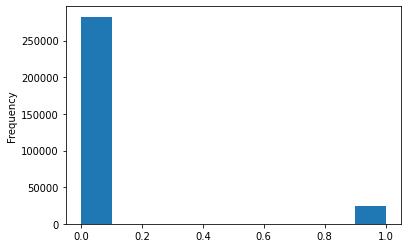

In [6]:
# Ici on a le même calcul que la cellule au dessus à la différence que on l'affiche sous forme d'histogramme
# Avec ce graphique, nous nous rendons compte de la grande différence entre les deux résultats
app_train['TARGET'].astype(int).plot.hist();

In [7]:
# Avec cette fonction, on s'intéresse au nombre et au pourcentage de valeurs manquantes dans chaque colonnes

# Fonction qui va calculé les valeurs manquantes par colonnes
def missing_values(df):
        # Nombre total de valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Le pourcentage de valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Ensuite on créé une table avec les résultats obtenus
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Pour clarifier les résultats, on renomme la colonne "0" en Valeurs manquantes
        # On renomme également la colonne "1" en Pourcentage du total des valeurs
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% du total des valeurs'})
        
        # Trier la table par pourcentage de valeurs manquantes de manière décroissante
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% du total des valeurs', ascending=False).round(1)
        
        # Quand la fonction sera appelé dans le code, les prints nous permettrons de voir visuellement les valeurs manquantes 
        print ("Le dataframe selectionné possède " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Pour finir on return le dataframe avec les informations manquantes
        return mis_val_table_ren_columns

In [8]:
# Ici, les statistiques des valeurs manquantes que l'on affiche
missing_values = missing_values(app_train)
missing_values.head(20)

Le dataframe selectionné possède 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


Valeurs manquantes  % du total des valeurs
COMMONAREA_MEDI                       214865                    69.9
COMMONAREA_AVG                        214865                    69.9
COMMONAREA_MODE                       214865                    69.9
NONLIVINGAPARTMENTS_MEDI              213514                    69.4
NONLIVINGAPARTMENTS_MODE              213514                    69.4
NONLIVINGAPARTMENTS_AVG               213514                    69.4
FONDKAPREMONT_MODE                    210295                    68.4
LIVINGAPARTMENTS_MODE                 210199                    68.4
LIVINGAPARTMENTS_MEDI                 210199                    68.4
LIVINGAPARTMENTS_AVG                  210199                    68.4
FLOORSMIN_MODE                        208642                    67.8
FLOORSMIN_MEDI                        208642                    67.8
FLOORSMIN_AVG                         208642                    67.8
YEARS_BUILD_MODE                      204488                    66.5
YEARS_BUILD_MEDI                      204488                    66.5
YEARS_BUILD_AVG                       204488                    66.5
OWN_CAR_AGE                           202929                    66.0
LANDAREA_AVG                          182590                    59.4
LANDAREA_MEDI                         182590                    59.4
LANDAREA_MODE                         182590                    59.4

In [9]:
# Dans cette partie nous comptons chaque type de colonnes. Cela va nous servir dans les prochaine cellule.
# Le nombre de chaque type de colonnes
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# Nombre de classe unique dans chaque colonne "object"
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
# Pour la suite et avec l'algorithem que nous utilision, il faut que l'on se charge de traiter les "categorical vaariables"
# Il faut donc que l'on encode les suivantes en "number" afin que le modèle puisse traiter c'est catégorie
# Pour se faire nous allons utiliser deux méthodes
# - Le label encoding : Pour chaque "categorical variable" avec 2 catégories uniques nous utiliserons cette méthode
# - Le One-Hot encoding : Si il y a 2+ "categorical variable" alors nous utiliserons le One-Hot encoding


# On créer un objet LabelEncoder()
le = LabelEncoder()
le_count = 0

# On itère sur les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # Si il y a 2 catégories ou moins alors on utilise la méthode "Label Encoding". (voir commentaire plus haut) 
        if len(list(app_train[col].unique())) <= 2:
            # On entraîne les données du "training data"
            le.fit(app_train[col])
            # On transforme les données du test et du "training data"
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            # On tient les comptes sur combiens de colonnes on étaient labelisées avec le "label encoder"
            le_count += 1
            
print('%d colonnes on était "label encoded"' % le_count)

3 colonnes on était "label encoded"


In [12]:
# L'encodement des "categorical variables" en "One-Hot Encoding"
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("L'étât du app_train : ", app_train.shape)
print("L'étât du test_train : ", app_test.shape)

L'étât du app_train :  (307511, 243)
L'étât du test_train :  (48744, 239)


In [13]:
# Pour entraîner le modèle correctement, nous avons besoin que les données soient cohérentes entre elles.
# En utilisant la méthode "One-Hot Encoding", d'autres colonnes ont étaient crées dans le "training dataset" 
# parce qu'il y avait des "categoricals variables" avec des catégories qui n'étaient pas représentés dans le "testing dataset"
# Nous avons donc besoin qu'il y est le même colonnes dans les deux dataset différent.
# Pour cela, nous allons "aligner" les dataset entre eux.

# On injecte le "TARGET"
train_labels = app_train['TARGET']

# On aligne le dataset "training data" et "testing data", on ne garde que les colonnes présentes dans les deux dataset. Les autres seront filtrés en conséquence (voir commentaire plus haut).
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# On réinjecte le "TARGET"
app_train['TARGET'] = train_labels

print("L'étât du app_train : ", app_train.shape)
print("L'étât du test_train : ", app_test.shape)

L'étât du app_train :  (307511, 240)
L'étât du test_train :  (48744, 239)


In [14]:
# Il y a des anomalies présente dans le dataset.
# Pour "supporter" ces anomalies, on peut utiliser la méthode describe.
# Les chiffres dans la colonnes "DAYS_BIRTH" sont négatifs ce qui les rends intraitables. 
# Du coup il faut d'une certaine manière obtenir des nombres positifs
# Pour cela nous pouvons prendre la colonne "DAYS_BIRTH" et on la multiplie par -1 et on la divise par le nombre de jour dans une année donc 365

(app_train['DAYS_BIRTH'] / -365).describe()

# Maintenant les données on l'air beaucoup plus cohérantes

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
# Les données ici n'ont pas l'air d'être justes, il n'y a qu'a regarder la valeur maximale !!!

app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

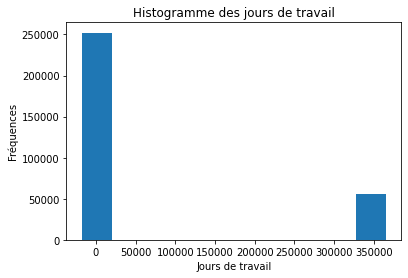

In [16]:
# Ici pareil on affiche les données sous forme de graphique

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours de travail');
plt.xlabel('Jours de travail');
plt.ylabel('Fréquences');

In [17]:
# Ici on remarque que les anomalies on un moins gros pourcentage par défaut

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Les non-anomalies sont activées par défaut sur %0.2f%% des prêts' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies sont activées par défaut sur %0.2f%% des prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours de travail non régulié' % len(anom))

Les non-anomalies sont activées par défaut sur 8.66% des prêts
Les anomalies sont activées par défaut sur 5.40% des prêts
Il y a 55374 jours de travail non régulié


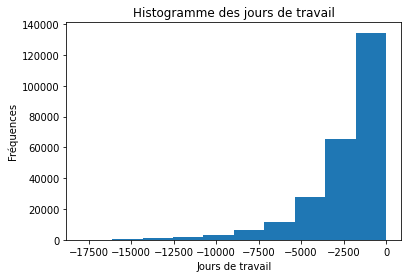

In [18]:
# On remplit les valeurs "anomalous" avec un nombre et créons alors une nouvelle colonne boolean indiquant si oui ou non la valeur était anomalous.np.nan

# Créer une colonne avec un drapeau "anomalous"
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Remplacer les valeurs "anomalous" par des "nan"
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours de travail');
plt.xlabel('Jours de travail');
plt.ylabel('Fréquences');

In [45]:
# On créer une nouvelle colonne pour dire au modèle que ces valeurs étaient à l’origine anormales et l'on remplit la colonne existante avec les données de test.np.nan

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)


anomalies = app_test["DAYS_EMPLOYED_ANOM"].sum()
entries = len(app_test)

result = {'anomalies': anomalies, 'entries': entries}

print('Il y a %d anomalies dans les datas du test pour %d entrées' % (anomalies, entries))

pickle.dump(result, open('anomalies.pkl', 'wb'))

{'anomalies': 0, 'entries': 48744}
Il y a 0 anomalies dans les datas du test pour 48744 entrées


In [20]:
# Cherchons des corrélations entre les fonctionnalités et la cible. Nous allons calculer le coefficient de corrélation entre chaque variable et la cible à l’aide de la méthode ".corr"

# On cherche des corrélations avec la "target" et le tri
correlations = app_train.corr()['TARGET'].sort_values()

# Afficher visuellement les corrélations
print('Les corrélation les plus positives:\n', correlations.tail(15))
print('\nLes corrélation les plus négatives:\n', correlations.head(15))

Les corrélation les plus positives:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Les

In [21]:
#  Prenons maintenant la valeur absolue de la fonctionnalité et la corrélation sera négative.DAYS_BIRTHTARGETDAYS_BIRTH

# Trouver la/les corrélation(s) de la journée positive depuis le "birth" et la "target"
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

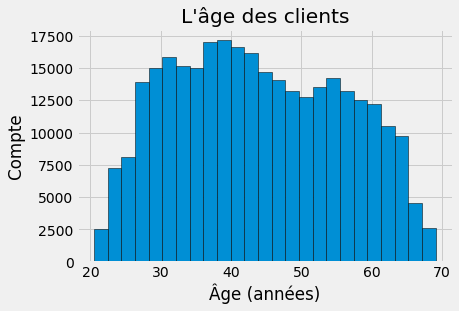

In [22]:
# À mesure que le client vieillit, il existe une relation linéaire négative avec la cible. Nous pouvons faire un histogramme de l’époque. Nous allons mettre l’axe x dans les années pour rendre l’intrigue un peu plus compréhensible.

# Paramétrer le stlyle des tracés
plt.style.use('fivethirtyeight')

# Graphique de la répartition des âges en année
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title("L'âge des clients"); plt.xlabel('Âge (années)'); plt.ylabel('Compte');

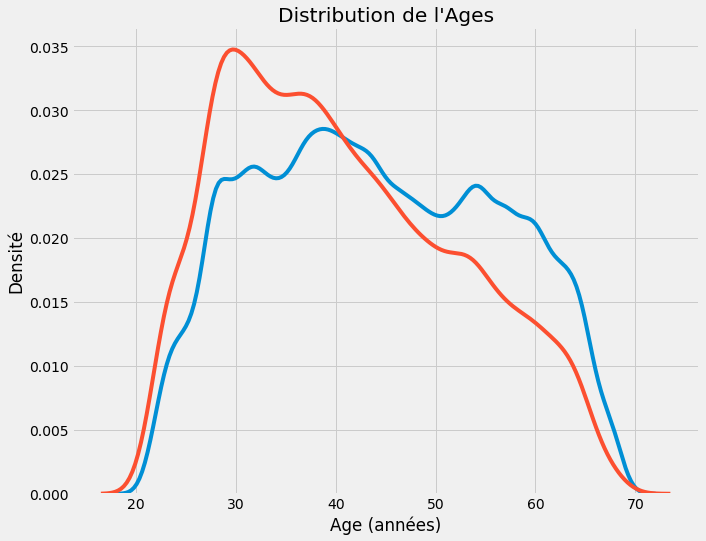

In [23]:
# Pour visualiser l’effet de l’âge sur la cible, nous ferons ensuite une parcelle d’estimation de densité de noyau (KDE) colorée par la valeur de la cible. Pour cela nous utiliserons le seaborn pour le graphique.kdeplot

plt.figure(figsize = (10, 8))

# Graphique "KDE" des prêt qui ont été remboursé à temps 
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# Graphique "KDE" des prêt qui n'ont pas été remboursé à temps 
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Graphique du "labeling"
plt.xlabel('Age (années)'); 
plt.ylabel('Densité'); 
plt.title("Distribution de l'Ages");

In [24]:
# Il nous faut examiner cette relation de la façon suivante : le défaut moyen de rembourser les prêts par tranche d’âge.
# Pour faire ce graphique, d’abord nous coupons la catégorie d’âge en bacs de 5 ans chacun. Ensuite, pour chaque bac, nous calculons la valeur moyenne de l’objectif, qui nous indique le ratio de prêts qui n’ont pas été remboursés dans chaque catégorie d’âge.

# Les informations sur "Age" dans un dataframe séparé
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Jeter le "age_data"
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [25]:
# On regroupe le "bin" et on calcule la moyenne
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

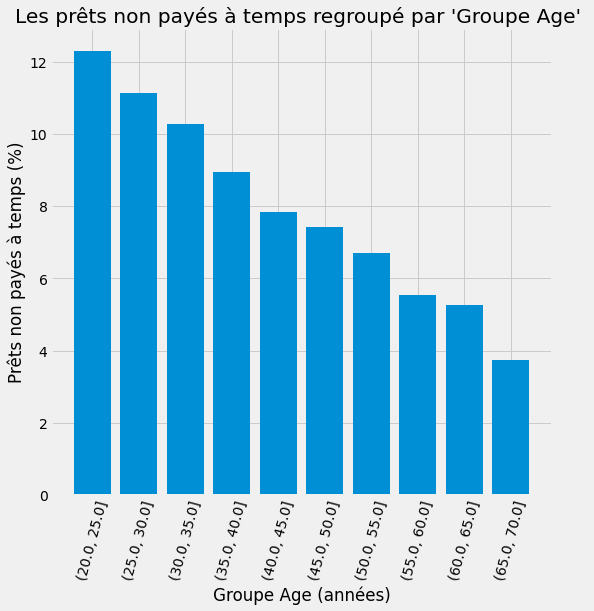

In [28]:
plt.figure(figsize = (8, 8))

# Desinner le graphe de l'age "bin" et de la moyenne de la cible
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

test = age_groups.index.astype(str), 100 * age_groups['TARGET']

# Graphique du "labeling"
plt.xticks(rotation = 75); 
plt.xlabel('Groupe Age (années)'); 
plt.ylabel('Prêts non payés à temps (%)')
plt.title("Les prêts non payés à temps regroupé par 'Groupe Age' ");

# Export du graphique
pickle.dump(test, open('loansNotPayInTime.pkl', 'wb'))

In [ ]:
# Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont "EXT_SOURCE_1", "EXT_SOURCE_2", et "EXT_SOURCE_3". Jetons un coup d’œil  sur ces variables.
# Tout d’abord, nous pouvons montrer les corrélations des fonctionnalités avec la cible et entre eux EXT_SOURCE

# Extraction de la variable "EXT_SOURCE" et affichage des corrélations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

# "Heatmap" des corrélations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Les corrélations montré sous forme de 'Heat Map'");

In [ ]:
# Les trois caractéristiques ont des corrélations négatives avec la cible, ce qui indique qu’à mesure que la valeur des augmentations grandissent, le client est plus susceptible de rembourser le prêt.
# Ensuite, nous pouvons donc regarder la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l’effet de cette variable sur cette même cible.

plt.figure(figsize = (10, 12))

# On itère sur les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # On créer un nouveau graphique pour chaque nouvelle sources
    plt.subplot(3, 1, i + 1)
    # Graphique des prêts remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # Graphique des prêts non remboursés à temps
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # On labelise les graphiques
    plt.title('Distribution de %s par valeur cible' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)

In [ ]:
# Ici, nous utilisons la bibliothèque de visualisation seaborn et la fonction PairGrid pour créer une parcelle de paires avec des diagrammes de dispersion sur le triangle supérieur, des histogrammes sur la diagonale, ainsi que des parcelles de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur.

# On copie les données pour faire les graphs
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Ajouter l'âge du client en années
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# On limite au 100000 premières lignes  et on filtre les valeurs "na"
plot_data = plot_data.dropna().loc[:100000, :]

# Fonction pour calculer le coéficient de la corrélation entre deux colonnes
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# On créer l'objet "PairGrid"
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Au dessus c'est un graphique en nuage de point
grid.map_upper(plt.scatter, alpha = 0.2)

# Ensuite en diagonale on dessine un histogramme
grid.map_diag(sns.kdeplot)

# Et pour finir, en dessous c'est un graphique sur la "densité"
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle("Graphique des caractéristiques de 'Ext Sources' et de l'Âge de pair ", size = 32, y = 1.05);

In [ ]:
# Dans le code suivant, nous créons des fonctionnalités polynomiales en utilisant les variables EXT_SOURCE et la variable DAYS_BIRTH. Et ce vaisant nous pouvons utiliser un degré de 3 pour voir les résultats.



# On créer un nouveau "dataframe" pour chaque caractéristiques polymoniale
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# On impute pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# On a besoin de imputer les valeurs manquantes
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# On créer l'objet polymoniale avec des degrés spécifiés
poly_transformer = PolynomialFeatures(degree = 3)



In [ ]:
# On entraine les caractéristiques polymoniale
poly_transformer.fit(poly_features)

# Et on tranforme les caractéristiques
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('La forme des caractéristiques polymoniale: ', poly_features.shape)

In [ ]:
# Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode des caractéristiques polynomial.get_feature_names

poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

In [ ]:
# Il ya 35 fonctionnalités avec des fonctionnalités individuelles élevées jusqu’au degré 3 ainsi que des termes d’interaction. Maintenant, nous pouvons voir si l’une de ces nouvelles fonctionnalités sont corrélées avec la cible.

# On créer un dataframe des caractéristiques
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# On y ajoute la cible (la "target")
poly_features['TARGET'] = poly_target

# On cherche les corrélations avec la cible/target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# On affiche les plus négatives et les plus positives
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

In [ ]:
# Plusieurs des nouvelles variables ont une corrélation plus grande (en termes de magnitude absolue) avec la cible que les caractéristiques d’origine
# Nous ajouterons ces fonctionnalités à une copie des données de formation et de test, puis évaluerons les modèles avec et sans les fonctionnalités.

# On ajoute les caractéristiques de "test" dans le dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# On fusionne les caractéristiques polymoniale dans le dataframe de "train"
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# On fusionne les caractéristiques polymoniale dans le dataframe de "test"
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# On aligne les deux dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# On affiche les nouvelles formes ou encore les nouveaux étâts
print("Les données du 'train' avec les caractéristiques des formes polymoniale: ", app_train_poly.shape)
print("Les données du 'test' avec les caractéristiques des formes polymoniale:  ", app_test_poly.shape)

In [ ]:
#  Nous pouvons maintenant faire quelques fonctionnalités qui tentent de capturer ce que nous pensons être important pour dire si un client fera  par défaut un prêt. Pour cela nous allons utiliser cinq fonctionnalités:

# CREDIT_INCOME_PERCENT: le pourcentage du montant du crédit par rapport au revenu d’un client
# ANNUITY_INCOME_PERCENT: le pourcentage de la rente de prêt par rapport au revenu d’un client
# CREDIT_TERM: la durée du paiement en mois (puisque la rente est le montant mensuel)
# DAYS_EMPLOYED_PERCENT: le pourcentage de jours travaillés par rapport à l’âge du client

app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [ ]:
# Nous devrions explorer visuellement ces variables de connaissances de domaine dans un graphique. Pour chacune d'entre elle, nous ferons la même parcelle KDE colorée par la valeur de la Target.



plt.figure(figsize = (12, 20))
# On itère sur les nouvelles caractéristiques
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # On créer un nouveau graphique pour chaque nouvelle sources
    plt.subplot(4, 1, i + 1)
    # Graphiques des prêt remboursés à temps
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # Graphiques des prêt non remboursés à temps
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # On labelise les graphiques
    plt.title('Distribution de %s par valeur cible' % feature)
    plt.xlabel('%s' % feature); 
    plt.ylabel('Densité');
    
plt.tight_layout(h_pad = 2.5)



In [ ]:
# Ici, nous nous concentrerons sur la mise en œuvre du modèle plutôt que d’expliquer les détails.
# Pour obtenir une ligne de base, nous allons utiliser toutes les fonctionnalités après l’encodage des variables catégoriques. Nous trions les données en remplissant les valeurs manquantes (imputation) et en normalisant la gamme des fonctionnalités.

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# On laisse tomber la "target" des datas du "training"
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Nom des caractéristiques
features = list(train.columns)

# Une copie de la data du "test"
test = app_test.copy()

# L'imputation sur la médiane des valeurs manquantes
imputer = SimpleImputer(strategy = 'median')

# On fait "scale" chaque caractéristique de 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# On entraine la data de "train"
imputer.fit(train)

# On transforme la data de "train" et de "test"
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
# Comme pour le "imputer", On répète avec le "scaler"
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Data du 'train' : ", train.shape)
print("Data du 'test' : ", test.shape)

In [ ]:
# Maintenant nous utilisons la syntaxe de modélisation Scikit-Learn : nous créons d’abord le modèle, puis nous formons le modèle utilisé, ainsi nous faisons des prédictions sur les données de test en utilisant .predict_proba.

from sklearn.linear_model import LogisticRegression

# On construit le modèle avec des paramètres de régularisation spécifiques 
log_reg = LogisticRegression(C = 0.0001)

# On entraine la donnée du "train"
log_reg.fit(train, train_labels)

In [ ]:
# Pouvant maintenant effectuer des prédiction nous voulons les probabilités de ne pas payer de prêt. Cela renvoie un tableau m x 2 où m est le nombre d’observations. Nous voulons que la probabilité que le prêt ne soit pas remboursé, nous sélectionnerons donc la colonne.predict.proba (où la probabilité est que la cible soit 1)

# On faits des prédictions
# On fait en sorte de selectionner uniquement la deuxième colonne
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [ ]:
# Les prédictions doivent être dans le format indiqué dans le fichier, où il n’y a que deux colonnes: SK_ID_CURR et TARGET. Nous allons créer un dataframe dans ce format à partir de l’ensemble de test et les prédictions appelées "submit".



# On soumet le dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()



In [ ]:
# Les prédictions représentent une probabilité comprise entre 0 et 1 que le prêt ne soit pas remboursé. Si nous utilisions ces prédictions pour classer les demandeurs, nous pouvons alors fixer un seuil de probabilité pour déterminer si un prêt est risqué ou non.

# On sauvegarde les entrées dans un fichier Excel en csv
submit.to_csv('log_reg_baseline.csv', index = False)

In [ ]:
# Afin d'optimiser les performances de notre algorithme nous allons utiliser le "Random Forest" sur ces mêmes données. Le Random Forest est un modèle beaucoup plus puissant. Nous utiliserons 100 arbres dans ce cas ci.

from sklearn.ensemble import RandomForestClassifier

# On fait le classifier "Random Forest"
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# On entraine la donnée du "training"
random_forest.fit(train, train_labels)

# On extrait les caractéristiques importantes
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# On fait des prédictions sur le dataset de "test"
predictions = random_forest.predict_proba(test)[:, 1]

In [ ]:
# On créer un dataframe pour les soumissions
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Et on le sauvegarde sous forme de csv
submit.to_csv('random_forest_baseline.csv', index = False)

In [ ]:
# Nous allons maintenant pouvoir voir si les fonctionnalités polynomiales et les connaissances de domaine améliore le modèle.  Et pour cela nous allons former un modèle sur ces même fonctionnalités. Nous pourrons ensuite comparer les performances de soumission à celles du modèle sans ces fonctionnalités.

poly_features_names = list(app_train_poly.columns)

# On impute les caractéristiques polynomiales
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Et ensuite on fait "scale" les caractéristiques polynomiales
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# On entraine la donnée du "training"
random_forest_poly.fit(poly_features, train_labels)

# On fait des prédictions sur le dataset de "test"
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

In [ ]:
# On créer un dataframe pour les soumissions
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Et on le sauvegarde de nouveau sous forme de csv
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

In [ ]:
# Maintenant, nous pouvons tester les fonctionnalités de domaine que nous avons faites à la main.

domain_features_names = list(app_train_domain.columns)

# On impute les caractéristiques "domainnomial"
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# On les faits "scale"
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# On entraine la donnée du "training"
random_forest_domain.fit(domain_features, train_labels)

# On extrait les caractéristiques importantes
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# On fait de nouveau des prédictions sur le dataset de "test"
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

In [ ]:
# Cela note 0,679 lorsqu’il est soumis, ce qui montre probablement que les fonctionnalités modifiées n’aident pas dans ce modèle.

# On créer un dataframe pour les soumissions
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Et on sauvegarde sous forme de csv
submit.to_csv('random_forest_baseline_domain.csv', index = False)

In [ ]:
# Examiner les importances de caractéristique de la "Random Forest" semble être une méthode simple pour voir quelles variables sont les plus pertinentes. Grace à l’analyse des données exploratoires nous pouvoins nous attendre à ce que les caractéristiques les plus importantes sont le  EXT_SOURCE et le DAYS_BIRTH.

def plot_feature_importances(df):
    # Cette fonction va retourner un graphique avec 15 barres horizontal des caractéristiques les plus importantes
    # Bien évidemment ce graphique provient du modèle entrainé
    # il prend en argument : (df) donc le dataframe
    
    # On tris les caractéristiques par ordre d'importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # On "normalise" les caractéristiques d'importance pour en ajouter jusqu'à une
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # On fait un graphique avec des barres horizontal des caractéristiques importantes
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # On a besoin d'inverser l'index tracer/afficher le plus important au dessus
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # On met en place les labels et les "ax.set_ytick"
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # On labelise les graphiques
    plt.xlabel('Importance normalisée '); 
    plt.title('Caractéristiques importantes')
    plt.show()
    
    return df

In [ ]:
# On affiche les caractéristiques importantes pour les caractéristiques par défaut en appelant la fonction créée plus haut
feature_importances_sorted = plot_feature_importances(feature_importances)

In [ ]:
# Visiblement les caractéristiques traitent EXT_SOURCE et DAYS_BIRTH comme nous le pensions. Cela nous permet également d'exclure une poignée de fonctionnalités semblant ne pas avoir une importance significative en comparaison.

feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

In [ ]:


from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    # Entrainer et tester un "Light Gradient" 
    # A la fin, nous regarderons à quel point notre modèle est précis
    
    # On extrait les ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # for training On extrait les labels pour l'entrainement
    labels = features['TARGET']
    
    # On supprime les ids et la cible
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    # On utilise le "One Hot Encoding"
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # On aligne les dataframes par les colonnes
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # On a pas besoin d'enregistrer des indices précis, on le laisse en 'auto'
        cat_indices = 'auto'
    
    #Le label encoding est en "integer"
    elif encoding == 'le':
        
        # On créer un "LabelEncoder"
        label_encoder = LabelEncoder()
        
        # on stocke les indices catégoriques dans une liste
        cat_indices = []
        
        # On itère sur chaque colonnes
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # On map les "features catégoriques" en integer
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # On enregistre les indices catégoriques
                cat_indices.append(i)
    
    # Si le schéma du "label encoding" n'est pas valide alors on catch l'erreur
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # On extrait les noms des "features"
    feature_names = list(features.columns)
    
    # On les convertis en "numpy array"
    features = np.array(features)
    test_features = np.array(test_features)
    
    # On créer le l'objet "Kfold"
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # On vide le tableau pour les "features importances"
    feature_importance_values = np.zeros(len(feature_names))
    
    # On vide le tableau pour les predictions sur les test
    test_predictions = np.zeros(test_features.shape[0])
    
    # On vide le tableau pour "sortir" les validations de nos prédictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Des listes pour enregistrer les scores de validation et du training
    valid_scores = []
    train_scores = []
    
    # On itère sur chaque "fold"
    for train_indices, valid_indices in k_fold.split(features):
        
        # On entraine la données pour le "fold"
        train_features, train_labels = features[train_indices], labels[train_indices]
        
        # On valide la données pour le "fold"
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # On créer le modèle
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # On entraine le modèle
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # On enregistre les "meilleurs" itérations
        best_iteration = model.best_iteration_
        
        # On enregistre les "features importances"
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # On fait les prédictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # On enregistre les prédictions sortis
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # On enregistre le meilleur score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # On nettoie la mémoire
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # On fait le dataframe de "submission"
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # On fait le dataframe également pour les "features importance"
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Le on généralise les scores
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # On ajoute les scores aux métriques
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # On a besoin de ça pour créer le dataframe du score
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Et pour finir le fameux dataframe des scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics



In [ ]:
submission, fi, metrics = model(app_train, app_test)
print('Les métriques')
print(metrics)

In [ ]:
# Ici on importe pickle et on va sauvegarder notre modèle en .sav afin de l'utiliser sur Flask.

# Instancier le nom de notre futur fichier .sav
pickle.dump(feature_importances_domain_sorted, open('model.pkl', 'wb'))
pickle.dump(metrics, open('metrics.pkl', 'wb'))